Facet Gird: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

```
# drop NCAM and psa == no
# plot NCAM and psa intensities 
"""
for enza yes/no see which measurements largest affect size
normalize data to be between 0-1
add column of difference of means between measurements and rank order
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html between enza yes/no
"""


ax = sns.violinplot(data = df, y='AreaShape_Zernike_1_1', x='Cell Line', hue='Enza', split=True,inner="quartile")
g = sns.FacetGrid(dt)
g.map(sns.violinplot, data = df, y='AreaShape_Zernike_1_1', x='Cell Line', hue='Enza', split=True, inner="quartile")
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler


pd.options.display.max_columns = None
pd.options.display.max_rows = None

sns.set_theme(style='whitegrid')

df = pd.read_csv('data/MR42D_vs_V16D.csv')
df.head()

,ImageNumber,ObjectNumber,Metadata_ChannelID,Metadata_FieldID,Metadata_FileLocation,Metadata_Frame,Metadata_Series,Metadata_TimeID,Metadata_WellID,Metadata_ZStackID,AreaShape_Area,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_Center_Z,AreaShape_Compactness,AreaShape_Eccentricity,AreaShape_EulerNumber,AreaShape_Extent,AreaShape_FormFactor,AreaShape_MajorAxisLength,AreaShape_MaxFeretDiameter,AreaShape_MaximumRadius,AreaShape_MeanRadius,AreaShape_MedianRadius,AreaShape_MinFeretDiameter,AreaShape_MinorAxisLength,AreaShape_Orientation,AreaShape_Perimeter,AreaShape_Solidity,AreaShape_Zernike_0_0,AreaShape_Zernike_1_1,AreaShape_Zernike_2_0,AreaShape_Zernike_2_2,AreaShape_Zernike_3_1,AreaShape_Zernike_3_3,AreaShape_Zernike_4_0,AreaShape_Zernike_4_2,AreaShape_Zernike_4_4,AreaShape_Zernike_5_1,AreaShape_Zernike_5_3,AreaShape_Zernike_5_5,AreaShape_Zernike_6_0,AreaShape_Zernike_6_2,AreaShape_Zernike_6_4,AreaShape_Zernike_6_6,AreaShape_Zernike_7_1,AreaShape_Zernike_7_3,AreaShape_Zernike_7_5,AreaShape_Zernike_7_7,AreaShape_Zernike_8_0,AreaShape_Zernike_8_2,AreaShape_Zernike_8_4,AreaShape_Zernike_8_6,AreaShape_Zernike_8_8,AreaShape_Zernike_9_1,AreaShape_Zernike_9_3,AreaShape_Zernike_9_5,AreaShape_Zernike_9_7,AreaShape_Zernike_9_9,Intensity_IntegratedIntensityEdge_NCAM1,Intensity_IntegratedIntensityEdge_PSA,Intensity_IntegratedIntensity_NCAM1,Intensity_IntegratedIntensity_PSA,Intensity_LowerQuartileIntensity_NCAM1,Intensity_LowerQuartileIntensity_PSA,Intensity_MADIntensity_NCAM1,Intensity_MADIntensity_PSA,Intensity_MassDisplacement_NCAM1,Intensity_MassDisplacement_PSA,Intensity_MaxIntensityEdge_NCAM1,Intensity_MaxIntensityEdge_PSA,Intensity_MaxIntensity_NCAM1,Intensity_MaxIntensity_PSA,Intensity_MeanIntensityEdge_NCAM1,Intensity_MeanIntensityEdge_PSA,Intensity_MeanIntensity_NCAM1,Intensity_MeanIntensity_PSA,Intensity_MedianIntensity_NCAM1,Intensity_MedianIntensity_PSA,Intensity_MinIntensityEdge_NCAM1,Intensity_MinIntensityEdge_PSA,Intensity_MinIntensity_NCAM1,Intensity_MinIntensity_PSA,Intensity_StdIntensityEdge_NCAM1,Intensity_StdIntensityEdge_PSA,Intensity_StdIntensity_NCAM1,Intensity_StdIntensity_PSA,Intensity_UpperQuartileIntensity_NCAM1,Intensity_UpperQuartileIntensity_PSA,Location_CenterMassIntensity_X_NCAM1,Location_CenterMassIntensity_X_PSA,Location_CenterMassIntensity_Y_NCAM1,Location_CenterMassIntensity_Y_PSA,Location_CenterMassIntensity_Z_NCAM1,Location_CenterMassIntensity_Z_PSA,Location_Center_X,Location_Center_Y,Location_MaxIntensity_X_NCAM1,Location_MaxIntensity_X_PSA,Location_MaxIntensity_Y_NCAM1,Location_MaxIntensity_Y_PSA,Location_MaxIntensity_Z_NCAM1,Location_MaxIntensity_Z_PSA,Number_Object_Number,Parent_Cell,Parent_Nuclei,Well_ID_CX5,Well_ID_CQ1,Cell Line,Enza,NCAM,PSA
0,1,1,NaN,1,NaN,0,0,1,26,0,951,1124,54,1,3.357605,0.657502,0,0.350405,0.117678,71.944827,62.032250,6.324555,2.320872,2.000000,44.368180,54.207052,-73.709537,318.674,0.441709,0.301288,0.022746,0.006931,0.042695,0.024688,0.040176,0.073370,0.024927,0.021540,0.019374,0.018482,0.022881,0.004236,0.040100,0.015024,0.009784,0.009154,0.017914,0.003311,0.003986,0.008774,0.011194,0.006264,0.010766,0.006838,0.005970,0.015320,0.015494,0.006253,0.009509,0.451575,0.974319,1.613931,3.423407,0.001663,0.003174,0.000031,0.000359,0.009646,1.145576,0.001892,0.005814,0.002029,0.006271,0.001691,0.003649,0.001697,0.003600,0.001694,0.003517,0.001572,0.002609,0.001572,0.002472,0.000052,0.000581,0.000056,0.000592,0.001724,0.003906,1139.341726,1139.989026,34.062750,34.996644,0,0,1139.338591,34.053628,1159,1122,54,55,0,0,1,1,1,B02,26,V16D,No,Yes,Yes
1,1,2,NaN,1,NaN,0,0,1,26,0,1368,1435,0,1,3.420318,0.384824,0,0.315862,0.121244,80.109556,72.034714,9.000000,2.869349,2.236068,59.584635,73.940330,77.899005,376.546,0.445966,0.312722,0.031769,0.028343,0.010886,0.009054,0.050782,0.098424,0.015860,0.027341,0.012084,0.017439,0.003163,0.006177,0.027920,0.009475,0.009098,0.007792,0.019921,0.007559,0.014137,0.030715,0.004792,0.017799,0.001822,0.002482,0.004768,0.004108,0.012052,0.003814,0.000894,

In [2]:
dt = df.loc[:, df.columns.str.startswith(('AreaShape_','Intensity_','Cell Line', 'Enza','NCAM','PSA'))]
dt.drop(columns=['AreaShape_Center_X','AreaShape_Center_Y','AreaShape_Center_Z'], axis=1, inplace=True)

/home/ben/.local/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(dt[dt.columns.difference(['Cell Line', 'Enza', 'NCAM', 'PSA']).values])


MinMaxScaler()

In [4]:
df_scaled = pd.DataFrame(scaler.fit_transform(dt[dt.columns.difference(['Cell Line', 'Enza', 'NCAM', 'PSA']).values]), columns=dt[dt.columns.difference(['Cell Line', 'Enza', 'NCAM', 'PSA'])].columns)

In [5]:
df_scaled[['Cell Line', 'Enza', 'NCAM', 'PSA']] = dt[['Cell Line', 'Enza', 'NCAM', 'PSA']]
df_scaled.head()

,AreaShape_Area,AreaShape_Compactness,AreaShape_Eccentricity,AreaShape_EulerNumber,AreaShape_Extent,AreaShape_FormFactor,AreaShape_MajorAxisLength,AreaShape_MaxFeretDiameter,AreaShape_MaximumRadius,AreaShape_MeanRadius,AreaShape_MedianRadius,AreaShape_MinFeretDiameter,AreaShape_MinorAxisLength,AreaShape_Orientation,AreaShape_Perimeter,AreaShape_Solidity,AreaShape_Zernike_0_0,AreaShape_Zernike_1_1,AreaShape_Zernike_2_0,AreaShape_Zernike_2_2,AreaShape_Zernike_3_1,AreaShape_Zernike_3_3,AreaShape_Zernike_4_0,AreaShape_Zernike_4_2,AreaShape_Zernike_4_4,AreaShape_Zernike_5_1,AreaShape_Zernike_5_3,AreaShape_Zernike_5_5,AreaShape_Zernike_6_0,AreaShape_Zernike_6_2,AreaShape_Zernike_6_4,AreaShape_Zernike_6_6,AreaShape_Zernike_7_1,AreaShape_Zernike_7_3,AreaShape_Zernike_7_5,AreaShape_Zernike_7_7,AreaShape_Zernike_8_0,AreaShape_Zernike_8_2,AreaShape_Zernike_8_4,AreaShape_Zernike_8_6,AreaShape_Zernike_8_8,AreaShape_Zernike_9_1,AreaShape_Zernike_9_3,AreaShape_Zernike_9_5,AreaShape_Zernike_9_7,AreaShape_Zernike_9_9,Intensity_IntegratedIntensityEdge_NCAM1,Intensity_IntegratedIntensityEdge_PSA,Intensity_IntegratedIntensity_NCAM1,Intensity_IntegratedIntensity_PSA,Intensity_LowerQuartileIntensity_NCAM1,Intensity_LowerQuartileIntensity_PSA,Intensity_MADIntensity_NCAM1,Intensity_MADIntensity_PSA,Intensity_MassDisplacement_NCAM1,Intensity_MassDisplacement_PSA,Intensity_MaxIntensityEdge_NCAM1,Intensity_MaxIntensityEdge_PSA,Intensity_MaxIntensity_NCAM1,Intensity_MaxIntensity_PSA,Intensity_MeanIntensityEdge_NCAM1,Intensity_MeanIntensityEdge_PSA,Intensity_MeanIntensity_NCAM1,Intensity_MeanIntensity_PSA,Intensity_MedianIntensity_NCAM1,Intensity_MedianIntensity_PSA,Intensity_MinIntensityEdge_NCAM1,Intensity_MinIntensityEdge_PSA,Intensity_MinIntensity_NCAM1,Intensity_MinIntensity_PSA,Intensity_StdIntensityEdge_NCAM1,Intensity_StdIntensityEdge_PSA,Intensity_StdIntensity_NCAM1,Intensity_StdIntensity_PSA,Intensity_UpperQuartileIntensity_NCAM1,Intensity_UpperQuartileIntensity_PSA,Cell Line,Enza,NCAM,PSA
0,0.003269,0.083461,0.646220,1.000000,0.364006,0.194288,0.039207,0.026616,0.030046,0.024636,0.022756,0.044843,0.074111,0.090502,0.003413,0.414977,0.375573,0.132247,0.030167,0.363995,0.230089,0.507784,0.440316,0.301593,0.394712,0.238476,0.282544,0.553365,0.045139,0.574415,0.320125,0.310558,0.177365,0.385522,0.086073,0.159117,0.140660,0.292970,0.167234,0.326392,0.343900,0.177876,0.475323,0.534912,0.256387,0.590966,0.008351,0.015400,0.003352,0.005694,0.007797,0.031461,0.0016,0.009946,0.000226,0.019131,0.000206,0.003518,0.000347,0.003641,0.002273,0.024524,0.003268,0.029304,0.002972,0.026278,0.000000,0.050708,0.0,0.043997,0.000183,0.002203,0.000313,0.002476,0.002710,0.026407,V16D,No,Yes,Yes
1,0.004925,0.085706,0.362592,1.000000,0.322752,0.200240,0.048558,0.036691,0.045143,0.034866,0.028128,0.071741,0.116237,0.932774,0.005321,0.419744,0.391358,0.184811,0.123360,0.092316,0.084033,0.641873,0.590677,0.191777,0.501126,0.148637,0.266582,0.076313,0.065820,0.399765,0.201764,0.288752,0.150953,0.428755,0.196637,0.565415,0.492393,0.125253,0.475719,0.054771,0.124762,0.142050,0.127351,0.415976,0.156320,0.055170,0.009869,0.056199,0.005030,0.021332,0.005848,0.117050,0.0032,0.045397,0.001948,0.048954,0.000165,0.013122,0.000286,0.012790,0.002271,0.091696,0.002925,0.112123,0.002229,0.105112,0.000000,0.064877,0.0,0.064877,0.000240,0.010341,0.000352,0.010123,0.002710,0.105627,V16D,No,Yes,Yes
2,0.001867,0.420078,0.896470,0.857143,0.056572,0.035566,0.102732,0.074956,0.024745,0.011838,0.000000,0.065696,0.078014,0.449042,0.011920,0.088464,0.046460,0.106976,0.007102,0.190073,0.019159,0.155753,0.038756,0.024419,0.276036,0.084911,0.076935,0.187081,0.025152,0.159352,0.141786,0.301458,0.051431,0.088857,0.130330,0.202416,0.115795,0.080058,0.084336,0.140021,0.317031,0.036566,0.023785,0.115042,0.174362,0.205884,0.014663,0.039381,0.001919,0.005528,0.005848,0.053958,0.0032,0.042846,0.000489,0.099969,0.000227,0.006806,0.000735,0.006472,0.002613,0.043833,0.003532,0.062776,0.002972,0.057115,0.000000,0

Example of violin plot of scaled data with and cutoff for all values `<=0.4` and quartile lines are modified to color mediand and quartile differently

In [ ]:
fd = df_scaled.loc[df_scaled['AreaShape_Compactness']<=0.4]
ax = sns.violinplot(data = fd, y='AreaShape_Compactness', x='Cell Line', hue='Enza', split=True,inner="quartile")
for l in ax.lines:
    l.set_linestyle('--')
    l.set_linewidth(0.6)
    l.set_color('red')
    l.set_alpha(0.8)
for l in ax.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(1.2)
    l.set_color('black')
    l.set_alpha(0.8)

Data Selected for actual screen, plots are scaled to be between 0-1 then outliers are cutoff and then re-scaled to be between 0-1 again.

Selected data

- *Intensity_MeanIntensity_PSA*
- *Intensity_IntegratedIntensity_NCAM1*

Plot Style

- Each iteration of `Enza` and `Cell Line` should be their own plot and 

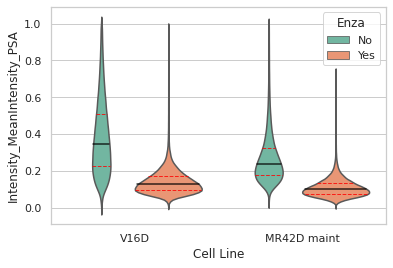

In [10]:
# fd = df_scaled.loc[df_scaled['Intensity_MeanIntensity_PSA']<=0.2]

sns.color_palette("hls", 8)



fd = df_scaled[df_scaled.columns.difference(['Cell Line', 'Enza', 'NCAM', 'PSA']).values] * 5

fd = fd.loc[fd['Intensity_MeanIntensity_PSA']<=1.0]


fd[['Cell Line', 'Enza', 'NCAM', 'PSA']] = dt[['Cell Line', 'Enza', 'NCAM', 'PSA']]
in_plot = sns.violinplot(data = fd, 
                         y='Intensity_MeanIntensity_PSA', 
                         x='Cell Line', 
                         hue='Enza', inner="quartile",
                         palette='Set2'
                        )

for l in in_plot.lines:
    l.set_linestyle('--')
    l.set_linewidth(1.0)
    l.set_color('red')
    l.set_alpha(0.8)
for l in in_plot.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(1.5)
    l.set_color('black')
    l.set_alpha(0.8)


in_fig = in_plot.get_figure()
plt.savefig('Intensity_MeanIntensity_PSA.svg', format='svg')

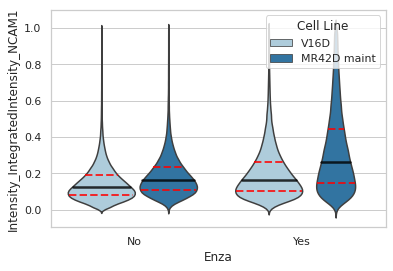

In [13]:
dat = df_scaled[df_scaled.columns.difference(['Cell Line', 'Enza', 'NCAM', 'PSA']).values]*20
dat[['Cell Line', 'Enza', 'NCAM', 'PSA']] = dt[['Cell Line', 'Enza', 'NCAM', 'PSA']]
dat  = dat.loc[dat['Intensity_IntegratedIntensity_NCAM1']<=1.0]
ax =sns.violinplot(data=dat, 
                    x='Enza', 
                    y='Intensity_IntegratedIntensity_NCAM1', 
                    hue='Cell Line', palette='Paired',
                    inner="quartile")

for l in ax.lines:
    l.set_linestyle('--')
    l.set_linewidth(2.0)
    l.set_color('red')
    l.set_alpha(0.8)
for l in ax.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(2.5)
    l.set_color('black')
    l.set_alpha(0.8)
    
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ax.grid(False)
plt.savefig('Intensity_IntegratedIntensity_NCAM1.svg', format='svg')